
## Les données du Sonar

### Détecter un rocher ou une mine

Un sonar (sound navigation ranging) est une technique qui utilise la propagation du son (généralement sous l'eau, comme dans la navigation sous-marine) pour naviguer, communiquer ou détecter des objets sur ou sous la surface de l'eau, comme d'autres navires.

Le dataset contient les mesures de réponse pour 60 fréquences sonar distinctes envoyées contre un champ de mines connu (et des rochers connus). Ces fréquences sont ensuite étiquetées en fonction de l'objet connu sur lequel le son était dirigé (soit un rocher, soit une mine).

Notre objectif principal est de créer un modèle de Machine Learning capable de détecter la différence entre un rocher et une mine sur la base de la réponse des 60 fréquences sonar distinctes.


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("sonar.all-data.csv")

In [24]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Exploration des Données

**Création d'une heatmap de la corrélation entre les différentes réponses en fréquence.**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [26]:
df_num_col = df.select_dtypes(include=['number'])
corr_matrix = df_num_col.corr()

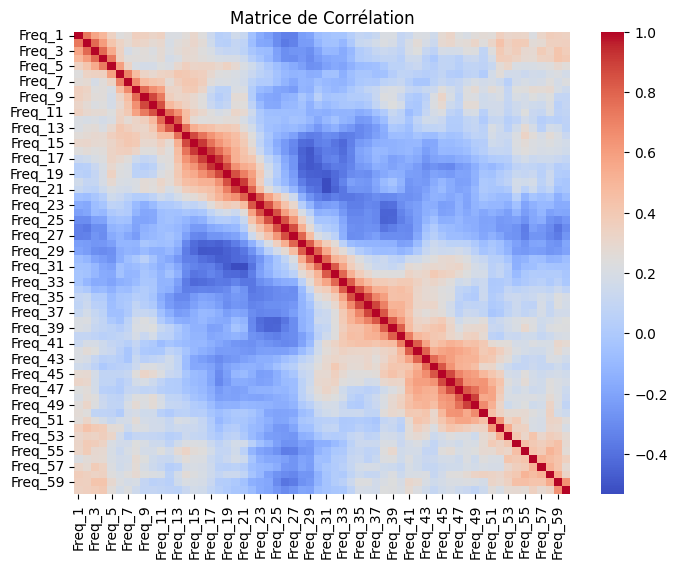

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

**Lles 5 fréquences les plus corrélées avec la variable cible (label/target) ?**

In [28]:
df['Target'] = df['Label'].map({'M': 0, 'R': 1})
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1


In [29]:
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label',
       'Target'],
      dtype='object')

In [30]:
df.drop(['Label'], axis=1, inplace=True)
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Target']
top_5_features = correlation_with_target.abs().nlargest(6).sort_values()
print(top_5_features)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64


## Fractionnement Entraînement / Test

Notre approche ici consistera à utiliser la validation croisée (Cross Validation) sur 90% de l'ensemble de données, puis à juger nos résultats sur un ensemble de test final de 10% pour évaluer notre modèle.

**Séparation des données en Features et en Label, puis divisez-les en un ensemble d'entraînement et un ensemble de test, avec 90 % pour l'entraînement (pour la validation croisée) et 10 % pour l'ensemble de test final.**

*On utilise un random_state de 42*

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**Création d'un PipeLine qui contient à la fois un StandardScaler et un modèle KNN.**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
knn = KNeighborsClassifier()
knn.get_params().keys()

operations = [('scaler', scaler), ('knn', knn)]

pipe = Pipeline(operations)


**Recherche par grille (GridSearch) avec le pipeline pour tester différentes valeurs de k et rapporter les paramètres les plus performants.**

In [40]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
k_values = list(range(1, 30))
param_grid = {'knn__n_neighbors': k_values}
grid_search = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [34]:
print(grid_search)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')


In [35]:
grid_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**Création d'un graphique de la moyenne des scores de test (mean_test_score) par valeur K, En utilisant le dictionnaire .cv_results_**

In [36]:
grid_search.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

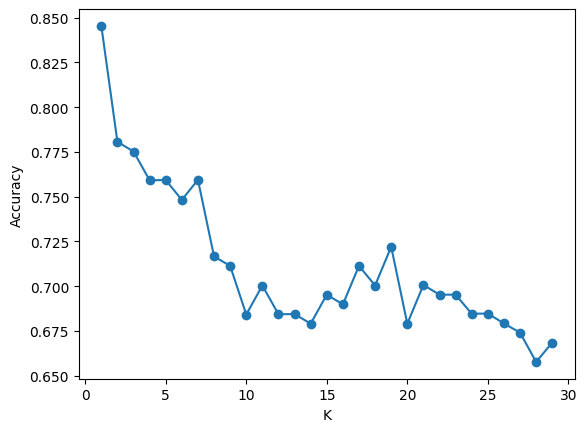

In [37]:
scores = grid_search.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy");

## Évaluation finale du modèle

**En utilisant l'objet de grille classificateur (grid classifier) de l'étape précédente, obtenez un rapport final de classification des performances et une matrice de confusion.**

In [38]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[12,  1],
       [ 1,  7]])

In [39]:
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

